In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import scipy
from tqdm import tqdm
import pandas as pd

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

math.sin(5)

-0.9589242746631385

0) Найдем число пи

1) Проверим центральную предельную теорему

2) Тестирование гипотез

3) Линал и матрицы

# 0

In [132]:
N = 100000
points = np.random.uniform(-1, 1, size=(N, 2))

In [133]:
4*(np.sum(points[:,0]**2 + points[:,1]**2 < 1)/N)

3.1474

In [134]:
x = np.linspace(1, 7)
logx = np.logspace(1, 7).astype(int)

In [135]:
errors = []
for _ in tqdm(range(100), position=0, leave=True):
    new_errors = []
    for N in logx:
        points = np.random.uniform(-1, 1, size=(N, 2))
        pi_est = 4*(np.sum(points[:,0]**2 + points[:,1]**2 < 1)/N)
        new_errors.append(abs(pi_est - np.pi)/np.pi)
    errors.append(new_errors)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


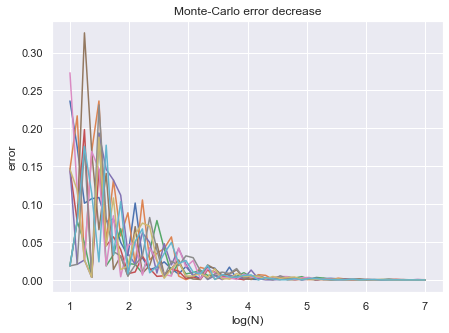

In [137]:
plt.figure(figsize=(7, 5))
plt.title("Monte-Carlo error decrease")
for i in range(10):
    plt.plot(x, errors[i])
plt.xlabel('log(N)')
plt.ylabel('error')
plt.grid(True)

In [140]:
errors = np.array(errors)
mean_errors = errors.mean(axis=0)
std_errors = errors.std(axis=0)

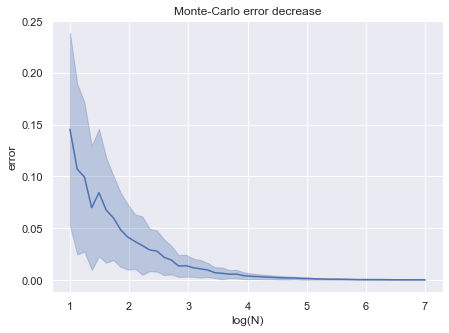

In [144]:
plt.figure(figsize=(7, 5))
plt.title("Monte-Carlo error decrease")
plt.plot(x, mean_errors)
plt.fill_between(x, (mean_errors - std_errors), (mean_errors + std_errors), color='b', alpha=.3)
plt.xlabel('log(N)')
plt.ylabel('error')
plt.grid(True)

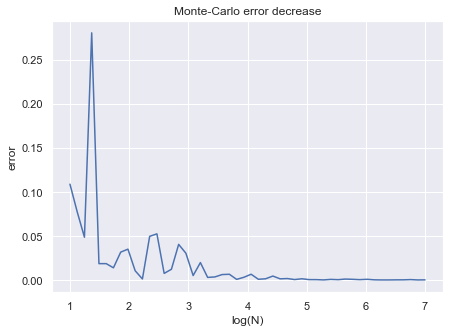

In [66]:
plt.figure(figsize=(7, 5))
plt.title("Monte-Carlo error decrease")
sns.lineplot(x, errors)
plt.xlabel('log(N)')
plt.ylabel('error')
plt.show()

# 1

In [59]:
N = 1000000
uniform_data = np.random.exponential(scale=3, size=N)

<AxesSubplot:ylabel='Density'>

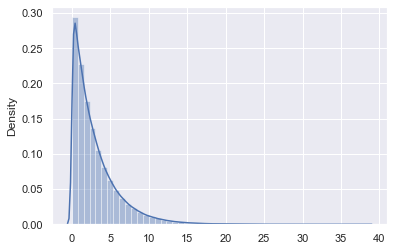

In [60]:
sns.distplot(uniform_data)

In [61]:
samples = uniform_data.reshape((N//400, 400))

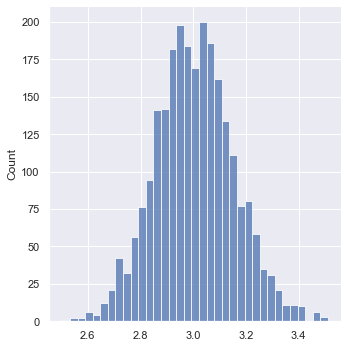

In [65]:
sns.displot(samples.mean(axis=1), kind="hist")

# 2

In [89]:
N = 200
df = pd.DataFrame()
df['dist1'] = np.random.normal(size=N)
df['dist2'] = np.random.normal(loc=0.1, size=N)

Демонстрация seaborn

In [90]:
df.head()

,dist1,dist2
0,0.682108,0.955123
1,0.357910,1.192970
2,0.042914,-0.159010
3,-0.452553,0.836868
4,0.584948,-0.274827


<AxesSubplot:xlabel='dist1', ylabel='dist2'>

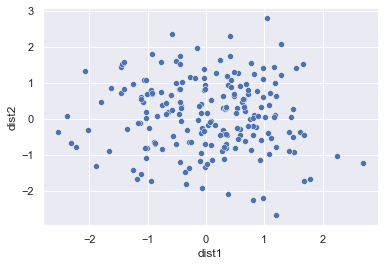

In [91]:
sns.scatterplot(x='dist1', y='dist2', data=df)

In [112]:
stat_result = scipy.stats.ttest_ind(df['dist1'], df['dist2'])

In [117]:
stat_result

Ttest_indResult(statistic=-0.786119634276879, pvalue=0.43226518044942464)

In [116]:
stat_result.pvalue

0.43226518044942464

In [93]:
df['target'] = 0.1*df['dist1'] + 2*df['dist1'] + np.random.normal(scale=0.3, size=N)

In [94]:
df.head()

,dist1,dist2,target
0,0.682108,0.955123,1.568449
1,0.357910,1.192970,1.017379
2,0.042914,-0.159010,0.010543
3,-0.452553,0.836868,-1.156219
4,0.584948,-0.274827,1.700671


In [95]:
import statsmodels.api as sm

model = sm.OLS(df['target'], df[['dist1', 'dist2']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              5432.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                   1.07e-173
Time:                        22:10:59   Log-Likelihood:                         -25.388
No. Observations:                 200   AIC:                                      54.78
Df Residuals:                     198   BIC:                                      61.37
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [118]:
stat_summary= results.summary2()

In [120]:
stat_summary.tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared (uncentered):,0.982
1,Dependent Variable:,target,AIC:,54.7759
2,Date:,2021-11-29 23:04,BIC:,61.3725
3,No. Observations:,200,Log-Likelihood:,-25.388
4,Df Model:,2,F-statistic:,5432.
5,Df Residuals:,198,Prob (F-statistic):,1.07e-173
6,R-squared (uncentered):,0.982,Scale:,0.076234


In [122]:
stat_summary.tables[1].to_excel('coefs.xlsx')

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

models = [LinearRegression(), Lasso(), Ridge()]
for model in models:
    """
        модель обучись
        модель предскажи
        измерь качество
    """
    pass

## Линал
решаем систему уравнений

In [100]:
A = np.array([
    [0.1, 2, 7],
    [3, -1, 3.5],
    [4, -9, 7.1]
])
b = np.array([5, 8, 0])

In [102]:
x = np.linalg.inv(A) @ b

In [104]:
np.exp(A)

array([[1.10517092e+00, 7.38905610e+00, 1.09663316e+03],
       [2.00855369e+01, 3.67879441e-01, 3.31154520e+01],
       [5.45981500e+01, 1.23409804e-04, 1.21196707e+03]])

## корреляции

In [107]:
df.corr()

,dist1,dist2,target
dist1,1.000000,-0.060222,0.990911
dist2,-0.060222,1.000000,-0.045031
target,0.990911,-0.045031,1.000000


In [109]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
dist1,0.682108,0.357910,0.042914,-0.452553,0.584948,-0.034032,-0.449698,0.581970,0.749562,0.829646,...,1.071182,0.026687,-0.583028,-1.399597,0.418424,-0.112150,1.289978,-0.336495,0.654161,1.287067
dist2,0.955123,1.192970,-0.159010,0.836868,-0.274827,1.384965,-1.192587,0.918975,-0.013541,0.094180,...,-0.388032,-1.251026,0.238062,1.571517,1.748600,0.362748,1.201232,-1.799793,0.321254,2.085329
target,1.568449,1.017379,0.010543,-1.156219,1.700671,-0.138555,-1.345121,1.349284,1.215849,2.036609,...,2.657070,0.414556,-1.338459,-3.529264,1.033375,-0.430278,2.607414,-0.699518,1.379212,2.772716


In [110]:
arr = [1, 2, 3]
arr[2] = 7

In [127]:

counties = ['Россия', 'Уганда', 'США', 'Англия']
years = list(range(2010, 2021))

stat = []
for country in counties:
    for year in years:
        stat.append([country, year, np.random.uniform(0.1, 4)])

        
data = pd.DataFrame(stat)
data.columns = ['Страна', 'Год', 'ВВП']

In [129]:
data.head()

,Страна,Год,ВВП
0,Россия,2010,1.552187
1,Россия,2011,3.852658
2,Россия,2012,2.582723
3,Россия,2013,2.373496
4,Россия,2014,1.308985


In [130]:
pd.pivot(data, index='Страна', columns='Год')

ВВП                                                              \
Год         2010      2011      2012      2013      2014      2015      2016   
Страна                                                                         
Англия  3.807407  3.956839  2.198267  1.381257  1.063683  2.543695  1.935804   
Россия  1.552187  3.852658  2.582723  2.373496  1.308985  0.163643  3.210000   
США     2.731038  3.498673  2.798874  3.570686  3.481290  1.398774  1.503103   
Уганда  2.519296  2.347904  2.678129  1.435245  2.941872  2.446761  0.491204   

                                                
Год         2017      2018      2019      2020  
Страна                                          
Англия  0.607010  3.877664  2.556098  1.742247  
Россия  1.037182  2.599311  0.428215  3.717044  
США     3.788369  1.182846  2.843415  3.548355  
Уганда  0.409938  3.436606  1.638980  0.510806

In [131]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [148]:
mas = np.random.normal(size=100)

In [149]:
mas

array([ 1.37148717,  0.81528016, -0.28925335, -0.55818901, -0.75665782,
       -0.18290839,  0.7479327 ,  0.47662306, -1.47321367, -0.83121635,
        0.31652774,  0.71475348,  0.95445417,  0.93990524, -1.22423931,
        1.40355153, -0.47535229,  1.0474717 , -1.37727288, -0.7969143 ,
       -2.70956182,  0.91533748,  0.2955415 , -0.68045339,  0.8700829 ,
       -1.14622698,  0.11139916, -0.40533022,  1.90654251, -0.15669366,
        1.46425697,  0.93704616, -0.92026722,  0.51094788,  0.48335294,
       -1.46183629, -0.95802118,  0.33438053,  1.23620539,  1.08738257,
       -1.21848603,  0.13273814, -2.08420698,  0.88670225,  0.78683886,
       -0.07980926,  1.37815939,  0.29341729,  1.07199995, -0.21434982,
       -0.56699064,  0.55046891, -0.10775184, -0.05534206,  1.5952    ,
        0.96891235,  1.47631459, -0.77301014,  0.46504917, -0.61654877,
       -1.78627038,  0.54400226, -0.38490393,  0.79358051, -0.6032376 ,
       -1.4416609 ,  0.69580442, -0.33062411, -0.47516901, -0.83

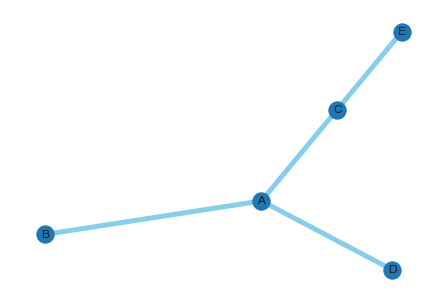

In [6]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Chart with Custom edges:
nx.draw(G, with_labels=True, width=5, edge_color="skyblue", style="solid")


In [2]:
!pip install networkx

ERROR: ecapture 0.1.8 has requirement scikit-image==0.14.2, but you'll have scikit-image 0.16.2 which is incompatible.
